# **Importacion de libreria** 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import svm, datasets
from sklearn.model_selection import validation_curve

# **Obtencion del dataset**

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd
df = pd.read_csv('data.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


# **Comprobacion**

In [ ]:
df.info()
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(df.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

,Total,%
date,0,0.0
price,0,0.0
statezip,0,0.0
city,0,0.0
street,0,0.0
yr_renovated,0,0.0
yr_built,0,0.0
sqft_basement,0,0.0
sqft_above,0,0.0
condition,0,0.0


In [ ]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
for col in cat_cols:
  print(df[col].value_counts(), "\n\n")

2014-06-23 00:00:00    142
2014-06-25 00:00:00    131
2014-06-26 00:00:00    131
2014-07-08 00:00:00    127
2014-07-09 00:00:00    121
                      ... 
2014-06-07 00:00:00      4
2014-07-06 00:00:00      3
2014-07-04 00:00:00      2
2014-05-11 00:00:00      2
2014-05-17 00:00:00      1
Name: date, Length: 70, dtype: int64 


2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
9413 34th Ave SW          2
6008 8th Ave NE           2
11034 NE 26th Pl          2
                         ..
1404 Broadmoor Dr E       1
3249 E Ames Lake Dr NE    1
6032 35th Ave NE          1
1006 NE Ravenna Blvd      1
18717 SE 258th St         1
Name: street, Length: 4525, dtype: int64 


Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woo

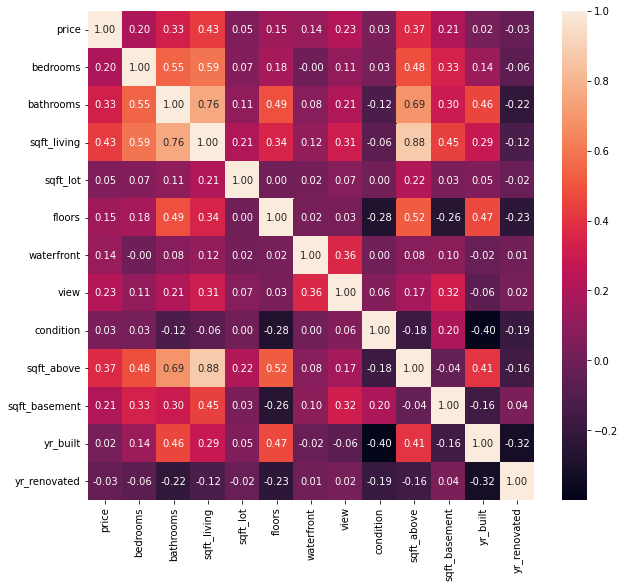

In [ ]:
corr = df.corr()
plt.subplots(figsize=(10,9))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

# **Preprocesamiento**

In [ ]:
df[['floors', 'bathrooms', 'bedrooms']] = df[['floors', 'bathrooms', 'bedrooms']].astype('int')
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [ ]:
(df['price']==0).sum()

49

In [ ]:
df['price'].replace(0,np.nan, inplace = True)
df.fillna(df['price'].mean(),inplace=True)

In [ ]:
df = df.drop(['street','date','sqft_lot','condition','yr_built','yr_renovated'], axis = 1)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'sqft_above', 'sqft_basement', 'city', 'statezip', 'country'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


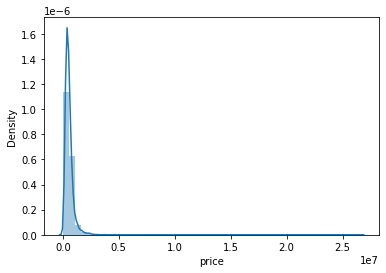

In [ ]:
sns.distplot(df.price)

In [ ]:
from scipy import stats
df['price'] = df['price'].replace([df['price'][np.abs(stats.zscore(df['price'])) > 3]],np.median(df['price']))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


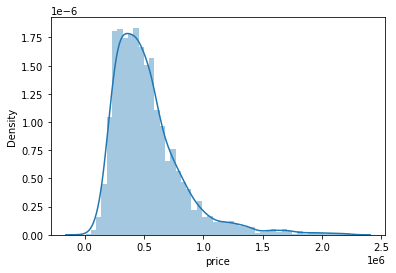

In [ ]:
sns.distplot(df.price)

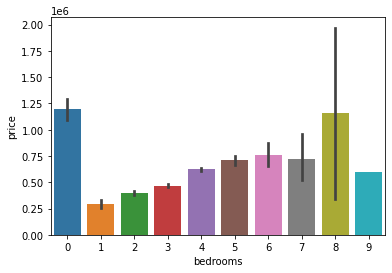

In [ ]:
sns.barplot(x=df.bedrooms , y = df.price)

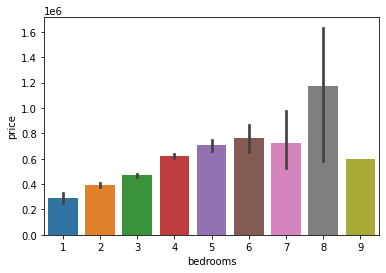

In [ ]:
df.bedrooms.replace(0, 8,inplace = True)
sns.barplot(x=df.bedrooms , y = df.price)

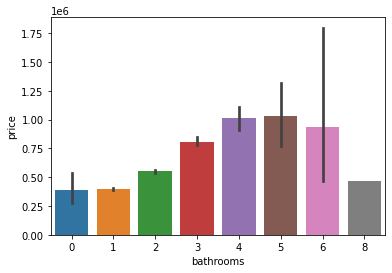

In [ ]:
sns.barplot(x=df.bathrooms , y = df.price)

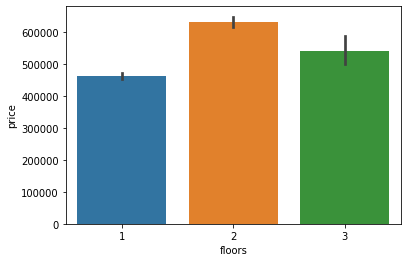

In [ ]:
sns.barplot(x=df.floors , y = df.price)

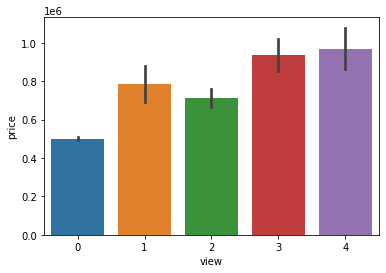

In [ ]:
sns.barplot(x=df.view , y = df.price)

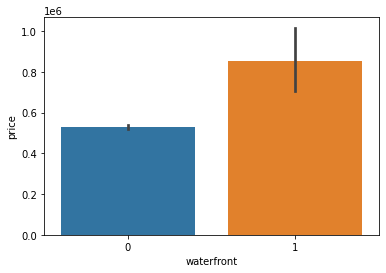

In [ ]:
sns.barplot(x=df.waterfront , y = df.price)

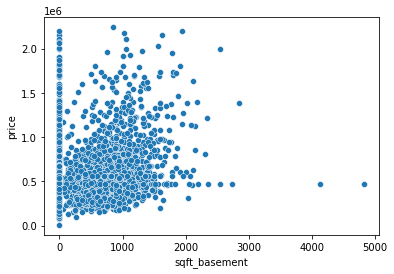

In [ ]:
sns.scatterplot(x=' ', y ='price',data= df)

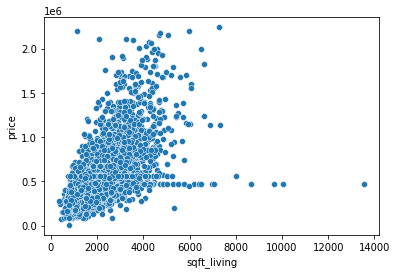

In [ ]:
sns.scatterplot(data = df, x='sqft_living',y='price')

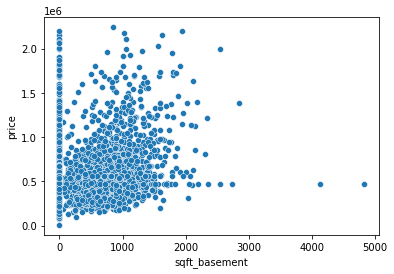

In [ ]:
sns.scatterplot(data = df, x='sqft_basement',y='price')

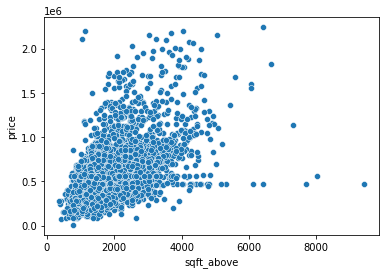

In [ ]:
sns.scatterplot(data = df, x='sqft_above',y='price')

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city,statezip,country
0,313000.0,3,1,1340,1,0,0,1340,0,Shoreline,WA 98133,USA
1,468750.0,5,2,3650,2,0,4,3370,280,Seattle,WA 98119,USA
2,342000.0,3,2,1930,1,0,0,1930,0,Kent,WA 98042,USA
3,420000.0,3,2,2000,1,0,0,1000,1000,Bellevue,WA 98008,USA
4,550000.0,4,2,1940,1,0,0,1140,800,Redmond,WA 98052,USA


In [ ]:
df[['city','statezip','country']] = df[['city','statezip','country']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          4600 non-null   float64 
 1   bedrooms       4600 non-null   int64   
 2   bathrooms      4600 non-null   int64   
 3   sqft_living    4600 non-null   int64   
 4   floors         4600 non-null   int64   
 5   waterfront     4600 non-null   int64   
 6   view           4600 non-null   int64   
 7   sqft_above     4600 non-null   int64   
 8   sqft_basement  4600 non-null   int64   
 9   city           4600 non-null   category
 10  statezip       4600 non-null   category
 11  country        4600 non-null   category
dtypes: category(3), float64(1), int64(8)
memory usage: 341.2 KB


In [ ]:
codificador3 = OneHotEncoder()
codificador4 = OneHotEncoder()
codificador5 = OneHotEncoder()

Codificacion3 = codificador3.fit_transform(df[['city']])
Codificacion4 = codificador4.fit_transform(df[['statezip']])
Codificacion5 = codificador5.fit_transform(df[['country']])

nuevas_col3 = pd.DataFrame(Codificacion3.toarray(), columns=codificador3.categories_)
nuevas_col4 = pd.DataFrame(Codificacion4.toarray(), columns=codificador4.categories_)
nuevas_col5 = pd.DataFrame(Codificacion5.toarray(), columns=codificador5.categories_)

nuevos_datos = pd.concat([nuevas_col3,nuevas_col4,nuevas_col5], axis=1)
nuevos_datos

,Algona,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,...,WA 98166,WA 98168,WA 98177,WA 98178,WA 98188,WA 98198,WA 98199,WA 98288,WA 98354,USA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4596,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_preprocesing = df.drop(df[['city','statezip','country']],axis=1)
df_preprocesing = pd.concat([df_preprocesing,nuevos_datos], axis=1)
df_preprocesing

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,"(Algona,)",...,"(WA 98166,)","(WA 98168,)","(WA 98177,)","(WA 98178,)","(WA 98188,)","(WA 98198,)","(WA 98199,)","(WA 98288,)","(WA 98354,)","(USA,)"
0,313000.000000,3,1,1340,1,0,0,1340,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,468750.000000,5,2,3650,2,0,4,3370,280,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,342000.000000,3,2,1930,1,0,0,1930,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,420000.000000,3,2,2000,1,0,0,1000,1000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,550000.000000,4,2,1940,1,0,0,1140,800,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3,1,1510,1,0,0,1510,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4596,534333.333333,3,2,1460,2,0,0,1460,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4597,416904.166667,3,2,3010,2,0,0,3010,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4598,203400.000000,4,2,2090,1,0,0,1070,1020,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# **Normalizacion**

In [ ]:
X = df_preprocesing.drop(['price'],axis=1)
Y = df_preprocesing['price']

scaler1 = MinMaxScaler(feature_range=(0, 1))
scaler1.fit(X)
X_n=scaler1.transform(X)
X_n = np.array(X_n)

scaler2 = MinMaxScaler(feature_range=(0, 1))
Y_n = Y.values
Y_n = Y_n.reshape(-1,1)

scaler2.fit(Y_n)
Y_n=scaler2.transform(Y_n)
Y_n = np.array(Y_n)

print(X_n.shape,Y_n.shape)

(4600, 130) (4600, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


# **Reduccion de Dimensionalidad**

In [ ]:
pca = PCA(n_components = 3)
pca.fit(X_n)
X_new = pca.transform(X_n)

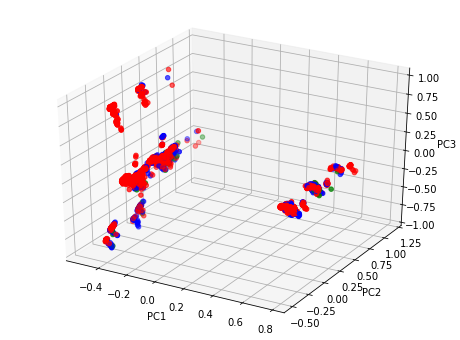

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection = '3d')
my_cmap = ListedColormap(['r','b','g'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.scatter(X_new[:,0], X_new[:,1], X_new[:,2], c=Y, cmap=my_cmap)

plt.grid()
plt.show()

# **Division del Dataset**

In [ ]:
X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA = train_test_split(X_new, Y_n, test_size = 0.3, random_state = 0)
print(X_train_PCA.shape)
print(X_test_PCA.shape)
print(Y_train_PCA.shape)
print(Y_test_PCA.shape)

(3220, 3)
(1380, 3)
(3220, 1)
(1380, 1)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y_n, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3220, 130)
(1380, 130)
(3220, 1)
(1380, 1)


# **Modelo SKlearn LinearRegression**

## **Creacion - Entrenamiento Modelo PCA**

In [ ]:
regr_PCA = LinearRegression()
regr_PCA.fit(X_train_PCA, Y_train_PCA)

LinearRegression()

## **Validacion modelo PCA**

In [ ]:
y_pred_PCA = regr_PCA.predict(X_test_PCA)

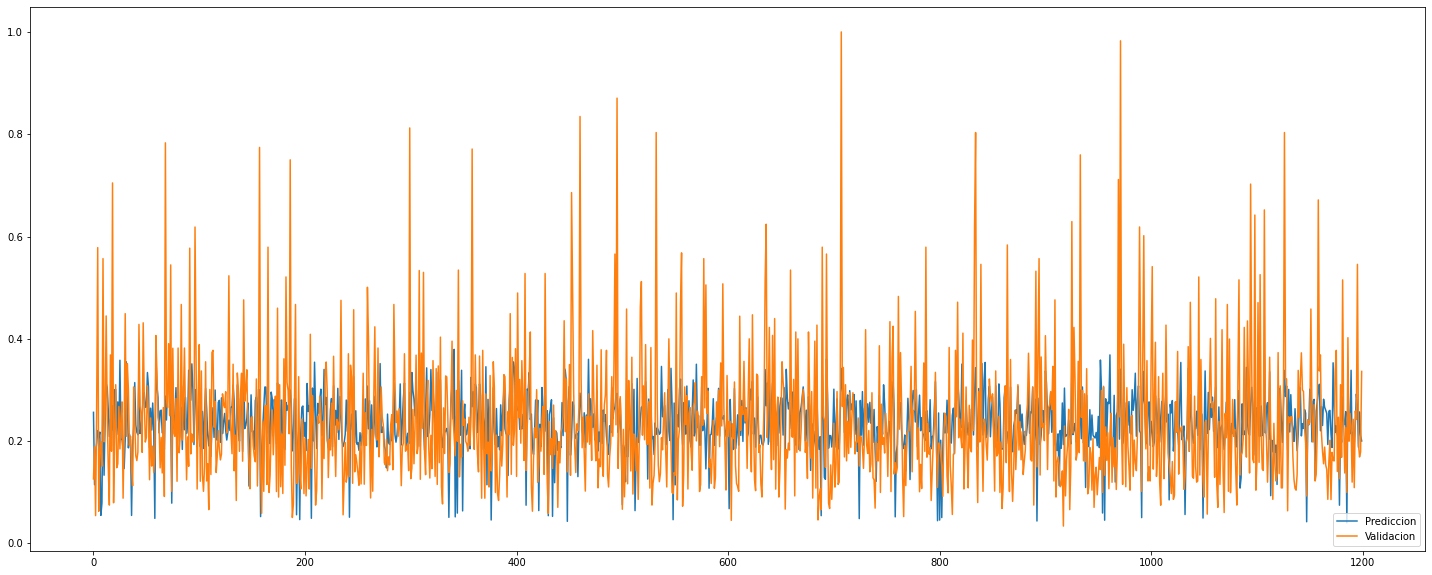

In [ ]:
fig, axs = plt.subplots(figsize=(25,10))

axs.plot(y_pred_PCA[:1200,:],'-', label='Prediccion')
axs.plot(Y_test_PCA[:1200,:],'-', label='Validacion')
axs.legend(loc='lower right')

In [ ]:
print(regr_PCA.score(X_train_PCA, Y_train_PCA))
print(regr_PCA.score(X_test_PCA,Y_test_PCA))

0.19125408163477386
0.18858100848240922


In [ ]:
regr_coef_LR_PCA = LinearRegression()
regr_coef_LR_PCA.fit(Y_test_PCA, y_pred_PCA)

print(regr_coef_LR_PCA.coef_)

[[0.19386301]]


In [ ]:
rmse = mean_squared_error(
        y_true  = Y_test_PCA,
        y_pred  = y_pred_PCA,
        squared = False
       )
print(1-rmse)

0.8825362642128654


## **Creacion - Entrenamiento Modelo Normal**

In [ ]:
regr = LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

## **Validacion modelo Normal**

In [ ]:
y_pred = regr.predict(X_test)

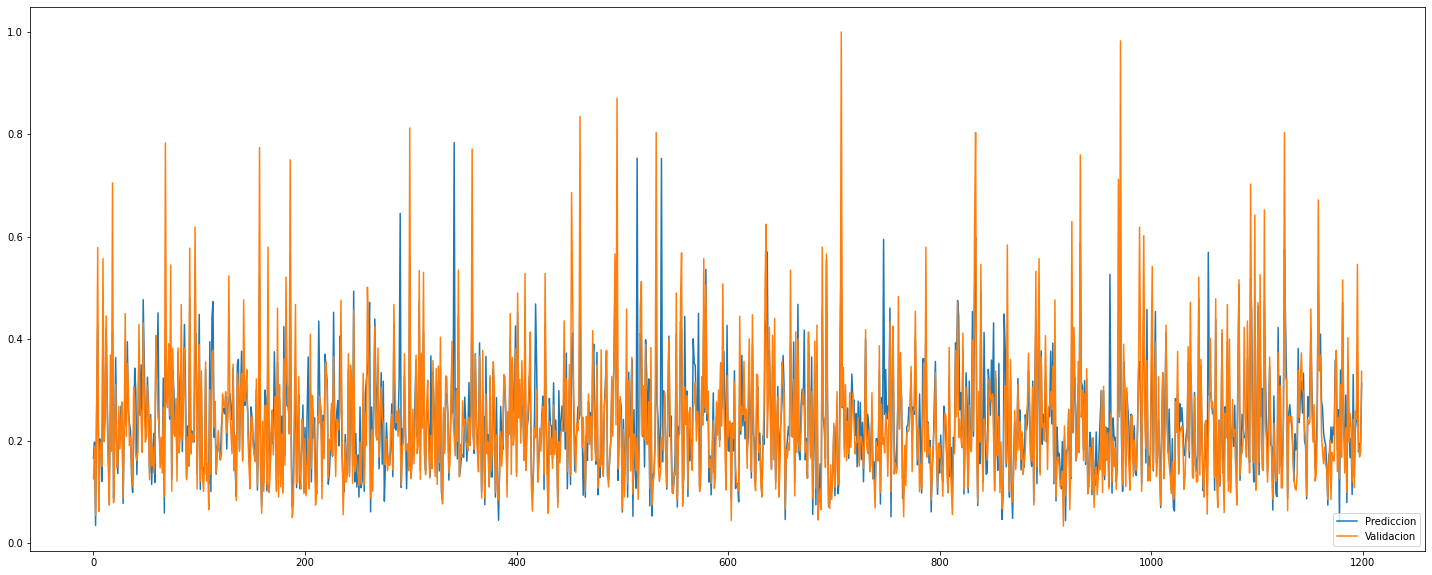

In [ ]:
fig, axs = plt.subplots(figsize=(25,10))

axs.plot(y_pred[:1200,:],'-', label='Prediccion')
axs.plot(Y_test[:1200,:],'-', label='Validacion')
axs.legend(loc='lower right')

In [ ]:
print(regr.score(X_train, Y_train))
print(regr.score(X_test,Y_test))

0.666828345328804
-4.366527022211116e+19


In [ ]:
regr_coef_LR = LinearRegression()
regr_coef_LR.fit(Y_test, y_pred)

print(regr_coef_LR.coef_)

[[-74276124.66596375]]


In [ ]:
rmse = mean_squared_error(
        y_true  = Y_test,
        y_pred  = y_pred,
        squared = False
       )
print(1-rmse)

-861686522.6351993


# **Modelo SKlearn RandomForestRegressor**

## **Creacion - Entrenamiento Modelo PCA**

In [ ]:
random_forest_PCA = RandomForestRegressor(max_depth=15, n_estimators=200)
random_forest_PCA.fit(X_train_PCA, Y_train_PCA)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_depth=15, n_estimators=200)

## **Validacion modelo PCA**

In [ ]:
Y_pred_RF_PCA = random_forest_PCA.predict(X_test_PCA)

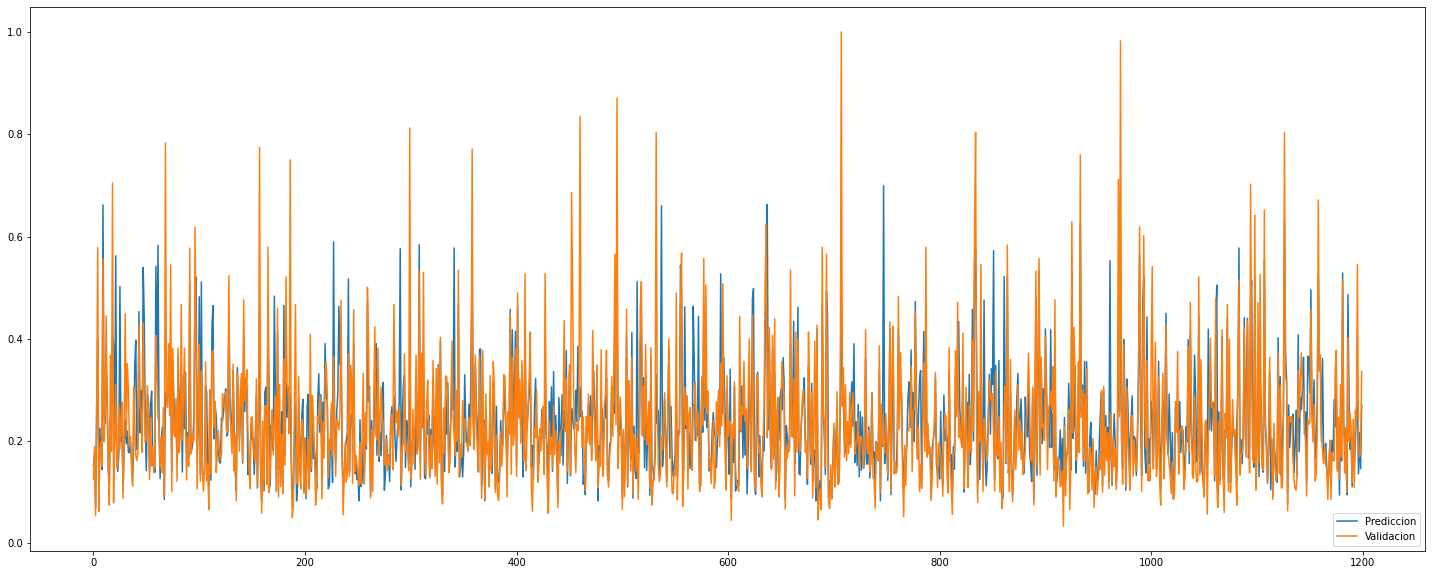

In [ ]:
fig, axs = plt.subplots(figsize=(25,10))

axs.plot(Y_pred_RF_PCA[:1200],'-', label='Prediccion')
axs.plot(Y_test_PCA[:1200],'-', label='Validacion')
axs.legend(loc='lower right')

In [ ]:
print(random_forest_PCA.score(X_train_PCA, Y_train_PCA))
print(random_forest_PCA.score(X_test_PCA, Y_test_PCA))

0.9264721784124216
0.5241469313088325


In [ ]:
regr_coef_RF_PCA = LinearRegression()
regr_coef_RF_PCA.fit(Y_test_PCA, Y_pred_RF_PCA)

print(regr_coef_RF_PCA.coef_)

[0.61016355]


In [ ]:
rmse = mean_squared_error(
        y_true  = Y_test_PCA,
        y_pred  = Y_pred_RF_PCA,
        squared = False
       )
print(1-rmse)

0.9100465836834789


## **Creacion - Entrenamiento Modelo Normal**

In [ ]:
random_forest = RandomForestRegressor(max_depth=30, n_estimators=400,criterion = "squared_error",min_samples_leaf=2,min_samples_split=15)
random_forest.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=15,
                      n_estimators=400)

## **Validacion modelo Normal**

In [ ]:
Y_pred_RF = random_forest.predict(X_test)

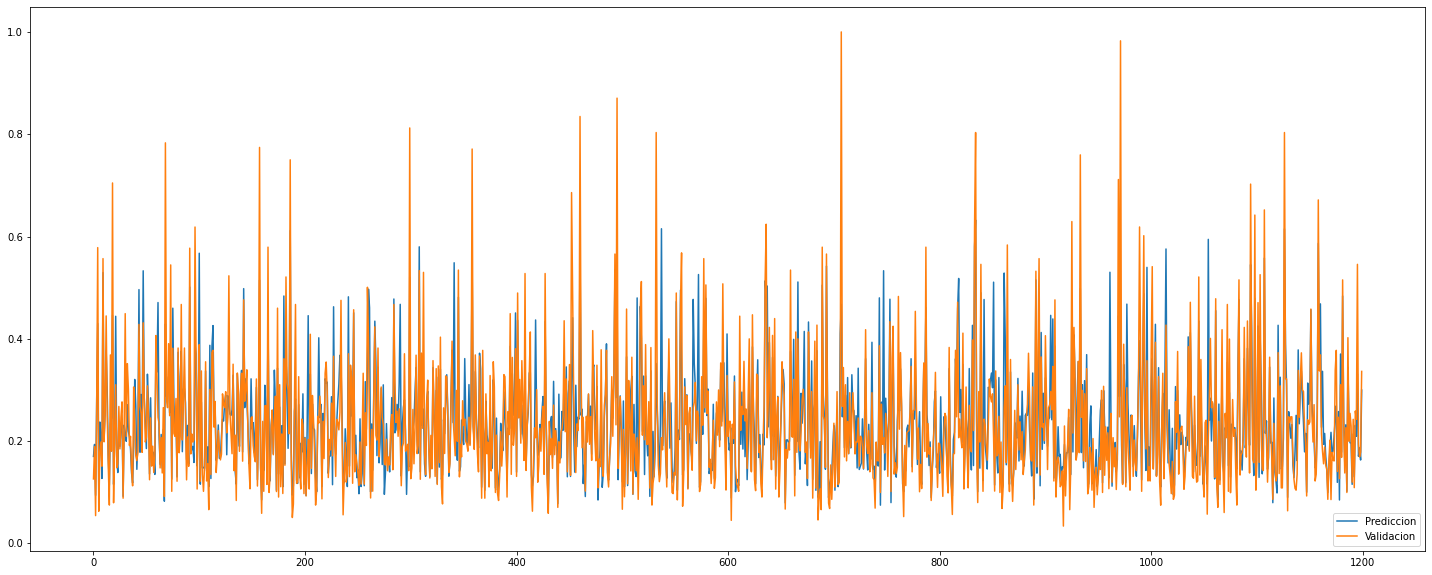

In [ ]:
fig, axs = plt.subplots(figsize=(25,10))

axs.plot(Y_pred_RF[:1200],'-', label='Prediccion')
axs.plot(Y_test[:1200],'-', label='Validacion')
axs.legend(loc='lower right')

In [ ]:
print(random_forest.score(X_train, Y_train))
print(random_forest.score(X_test, Y_test))

0.8145412587957646
0.6613769050263046


In [ ]:
regr_coef_RF = LinearRegression()
regr_coef_RF.fit(Y_test, Y_pred_RF)

print(regr_coef_RF.coef_)

[0.6658818]


In [ ]:
rmse = mean_squared_error(
        y_true  = Y_test,
        y_pred  = Y_pred_RF,
        squared = False
       )
print(1-rmse)

0.9241178701390911


# **Modelo SKlearn AdaBoostRegressor**

## **Creacion - Entrenamiento Modelo PCA**

In [ ]:
adaboost_reg_PCA = AdaBoostRegressor(n_estimators=300,learning_rate=0.005,loss='exponential')
adaboost_reg_PCA.fit(X_train_PCA,Y_train_PCA)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(learning_rate=0.005, loss='exponential', n_estimators=300)

## **Validacion modelo PCA**

In [ ]:
Y_pred_AB_PCA = adaboost_reg_PCA.predict(X_test_PCA)

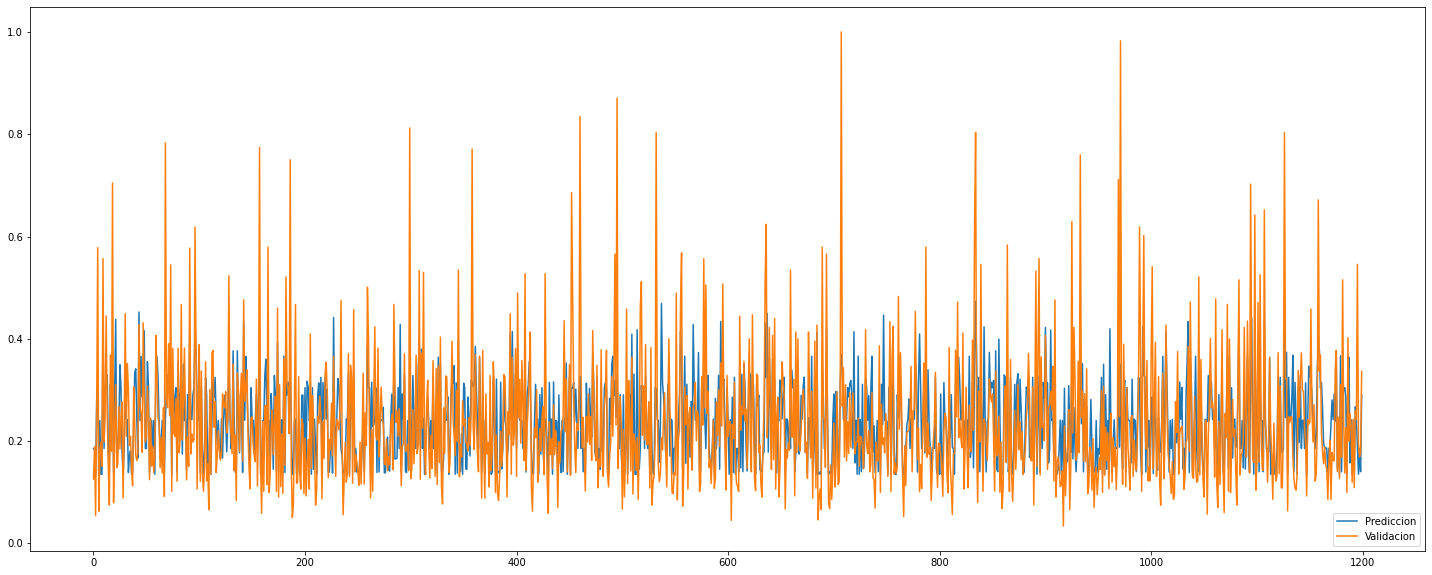

In [ ]:
fig, axs = plt.subplots(figsize=(25,10))

axs.plot(Y_pred_AB_PCA[:1200],'-', label='Prediccion')
axs.plot(Y_test_PCA[:1200],'-', label='Validacion')
axs.legend(loc='lower right')

In [ ]:
print(adaboost_reg_PCA.score(X_train_PCA, Y_train_PCA))
print(adaboost_reg_PCA.score(X_test_PCA, Y_test_PCA))

0.44206738017631386
0.38082565295144755


In [ ]:
regr_coef_AB_PCA = LinearRegression()
regr_coef_AB_PCA.fit(Y_test_PCA, Y_pred_AB_PCA)

print(regr_coef_AB_PCA.coef_)

[0.3761247]


In [ ]:
rmse = mean_squared_error(
        y_true  = Y_test_PCA,
        y_pred  = Y_pred_AB_PCA,
        squared = False
       )
print(1-rmse)

0.897390469089793


## **Creacion - Entrenamiento Modelo Normal**

In [ ]:
adaboost_reg = AdaBoostRegressor(random_state=0, n_estimators=300,learning_rate=0.001)
adaboost_reg.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(learning_rate=0.001, n_estimators=300, random_state=0)

## **Validacion modelo Normal**

In [ ]:
Y_pred_AB = adaboost_reg.predict(X_test)

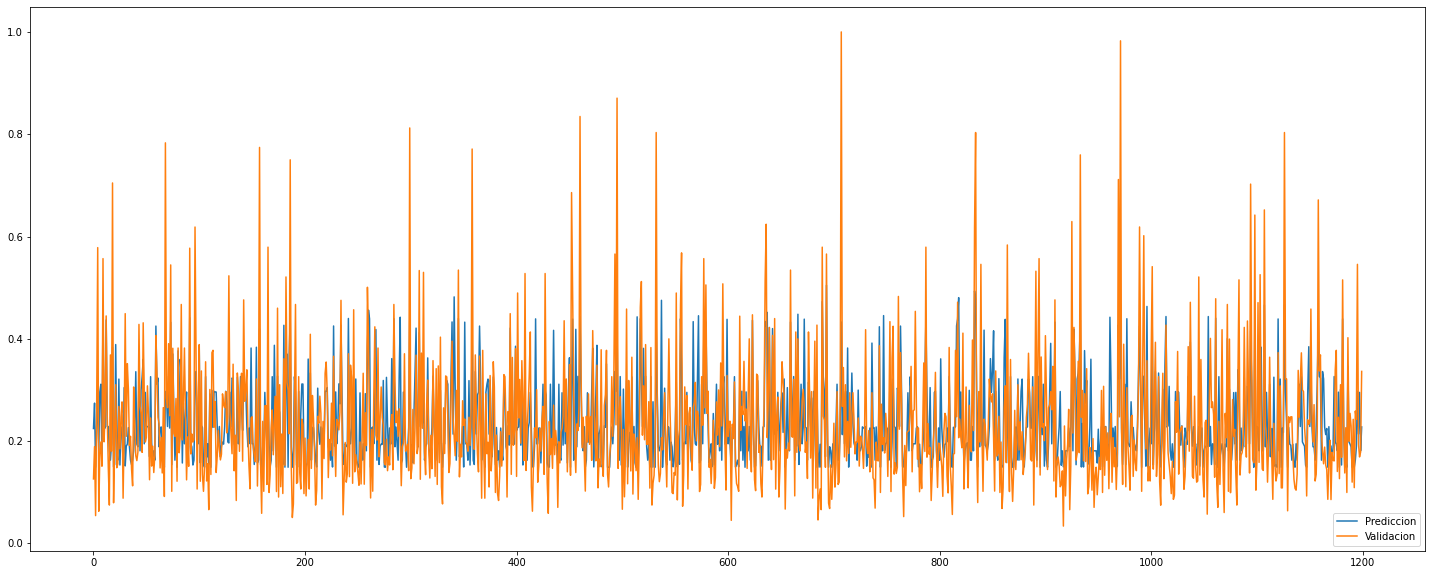

In [ ]:
fig, axs = plt.subplots(figsize=(25,10))

axs.plot(Y_pred_AB[:1200],'-', label='Prediccion')
axs.plot(Y_test[:1200],'-', label='Validacion')
axs.legend(loc='lower right')

In [ ]:
print(adaboost_reg.score(X_train, Y_train))
print(adaboost_reg.score(X_test, Y_test))

0.4836771105650328
0.4441234389905957


In [ ]:
regr_coef_AB = LinearRegression()
regr_coef_AB.fit(Y_test, Y_pred_AB)

print(regr_coef_AB.coef_)

[0.3761247]


In [ ]:
rmse = mean_squared_error(
        y_true  = Y_test,
        y_pred  = Y_pred_AB,
        squared = False
       )
print(1-rmse)

0.9027766893046371
